In [8]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from torchvision import models, transforms, datasets
from skimage import io
import cv2
import random
import pandas as pd
import os
import torch
from metrics.utils import *
from techniques.generate_grounding import gen_grounding
from data_utils.data_setup import get_test_loader
import scipy as sp

In [9]:
import saliency
from matplotlib import pylab as P
def ShowGrayscaleImage(im, title='', ax=None):
    if ax is None:
        P.figure()
        P.axis('off')
    P.imshow(im, cmap=P.cm.gray, vmin=0, vmax=1)
    P.title(title)

In [10]:
# Number of workers to load data
workers = 8
# Directory with images split into class folders.
# Since we don't use ground truth labels for saliency all images can be 
# moved to one class folder.
datadir = '../data/test/'
# Sets the range of images to be explained for dataloader.
img_range = range(95, 105)
# Size of imput images.
input_size = (224, 224)
# Size of batches for GPU. 
# Use maximum number that the GPU allows.
gpu_batch = 250

In [11]:
# Image preprocessing function
preprocess = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                # Normalization for ImageNet
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
            ])

dataset = datasets.ImageFolder(datadir, preprocess)

# This example only works with batch size 1. For larger batches see RISEBatch in explanations.py.
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=1, shuffle=True,
    num_workers=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


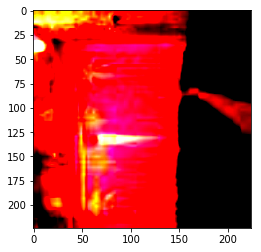

In [12]:
for i, (img, label) in enumerate(data_loader):
    val_img = img.numpy()[0].swapaxes(0,2)
    plt.imshow(val_img)
    plt.show()
    break

In [13]:
val_img

array([[[ 2.0091617 ,  0.71288526, -0.5669716 ],
        [ 2.0262864 ,  0.71288526, -0.54954237],
        [ 2.11191   ,  0.76540625, -0.44496724],
        ...,
        [-2.0322802 , -2.0357141 , -1.8044444 ],
        [-2.0494049 , -2.0357141 , -1.8044444 ],
        [-2.0494049 , -2.0357141 , -1.8044444 ]],

       [[ 1.9920369 ,  0.71288526, -0.5669716 ],
        [ 2.0091617 ,  0.71288526, -0.54954237],
        [ 2.11191   ,  0.76540625, -0.44496724],
        ...,
        [-2.0322802 , -2.0357141 , -1.8044444 ],
        [-2.0494049 , -2.0357141 , -1.8044444 ],
        [-2.0494049 , -2.0357141 , -1.8044444 ]],

       [[ 1.8721637 ,  0.69537824, -0.60182995],
        [ 1.8892884 ,  0.71288526, -0.5844008 ],
        [ 2.0262864 ,  0.76540625, -0.47982562],
        ...,
        [-2.0322802 , -2.0357141 , -1.8044444 ],
        [-2.0494049 , -2.0357141 , -1.8044444 ],
        [-2.0494049 , -2.0357141 , -1.8044444 ]],

       ...,

       [[ 0.14256364, -0.84523803, -1.3861438 ],
        [ 0

Generating filters: 100%|██████████| 6000/6000 [00:13<00:00, 437.44it/s]


Masks are generated.
got to stack


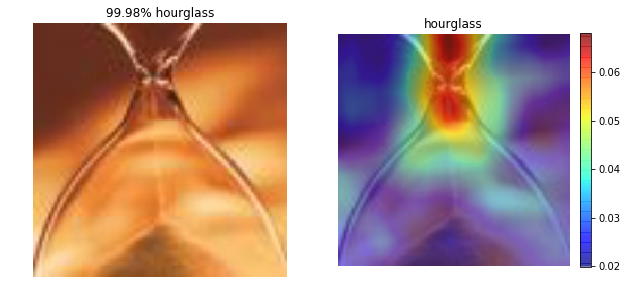

In [6]:
rise_expl, rise_mask = gen_grounding(img, 'resnet18', 'rise', show=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


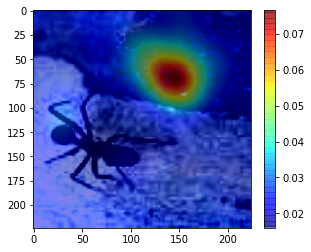

In [106]:
plt.imshow(val_img)
plt.imshow(rise_mask, cmap='jet', alpha=0.5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.savefig('../results/explanation_examples/spider/rise_spider.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


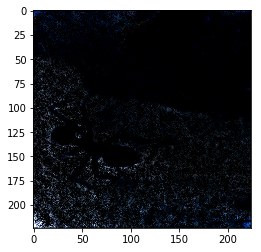

In [107]:
ig_expl, ig_mask = gen_grounding(val_img, 'vgg19', 'ig', show=True)

In [1]:
plt.imshow(val_img)
plt.imshow(ig_mask, cmap='jet', alpha=0.5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.savefig('../results/explanation_examples/spider/ig_spider.png')

NameError: name 'plt' is not defined

False


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.05028] matchstick


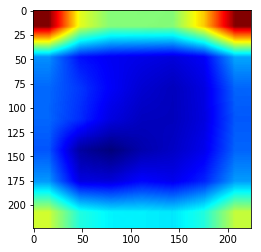

In [108]:
gcam_expl, gcam_mask = gen_grounding(val_img, 'vgg19', 'gcam', show=True)

In [126]:
lime_expl, lime_mask = gen_grounding(val_img, 'vgg19', 'lime', show=True)

TypeError: Cannot handle this data type

In [54]:
#from skimage import data, filters, segmentation
#from skimage.segmentation import flood, flood_fill
#light_coat = segmentation.flood_fill(img_mask, (0, 0), 255, tolerance=10)

def floodfill(matrix, x, y):
    #"hidden" stop clause - not reinvoking for "c" or "b", only for "a".
    if matrix[x][y] == "a":  
        matrix[x][y] = "c" 
        #recursively invoke flood fill on all surrounding cells:
        if x > 0:
            floodfill(matrix,x-1,y)
        if x < len(matrix[y]) - 1:
            floodfill(matrix,x+1,y)
        if y > 0:
            floodfill(matrix,x,y-1)
        if y < len(matrix) - 1:
            floodfill(matrix,x,y+1)

In [56]:
floodfill(ig_expl2, 0, 0)

/Users/lisadunlap/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


In [59]:
np.unique(temp-ig_expl2)

array([0.])

In [90]:
from metrics.utils import *
mask = preprocess_groundings(ig_mask, threshold=100)

ValueError: operands could not be broadcast together with shapes (224,224,3) (224,224) (224,224,3) 

In [ ]:
gray = saliency.VisualizeImageGrayscale(mask)
ShowGrayscaleImage(gray)

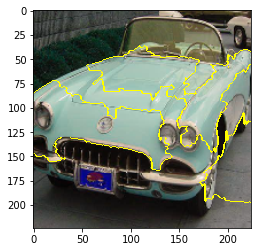

In [58]:
lime_expl, lime_mask = gen_grounding(val_img, 'resnet18', 'lime', show=True)

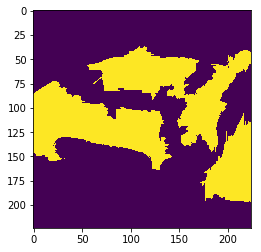

In [62]:
import numpy as np 
mask = preprocess_groundings(lime_mask, threshold=100)
plt.imshow(mask)

In [68]:
np.sum(mask)

2.000000057333189

False
[0.70454] convertible


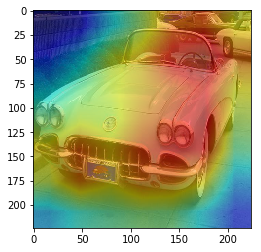

In [65]:
gcam_expl, gcam_mask = gen_grounding(val_img, 'resnet18', 'gcam', show=True)

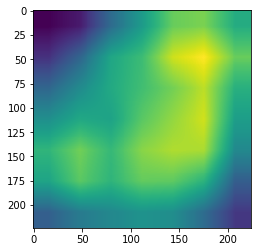

In [66]:
mask2 = preprocess_groundings(gcam_mask, threshold=100)
plt.imshow(mask2)

In [67]:
np.sum(mask2)

1.999999988451419

In [75]:
gcam_expl, gcam_mask = gen_grounding(val_img, 'resnet18', 'rise', path=path, show=True)

Generating filters: 100%|██████████| 6000/6000 [00:13<00:00, 444.87it/s]


Masks are generated.
got to stack


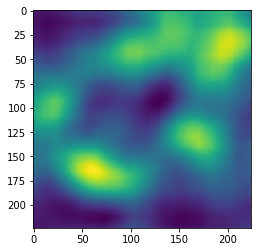

In [84]:
plt.imshow(gcam_mask)

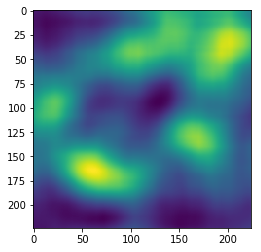

In [87]:
mask3 = preprocess_groundings(gcam_mask, threshold=100)
plt.imshow(mask3)

In [88]:
np.sum(mask3)

2.000000000547414